In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [27]:
d = pd.read_csv("new.csv")
d

,full_and_partial,new_cases,electricity,mobile,internet,access to education
0,73,7678,96.30,54.41,55.14,15.3
1,69,79723,100.00,74.35,82.37,4.1
2,70,20739,99.76,45.76,65.00,3.3
3,70,317,99.71,67.84,80.53,3.1
4,53,10256,100.00,49.23,75.80,6.1
5,70,13896,100.00,51.25,54.06,2.6
6,71,2018,100.00,30.35,50.49,1.9
7,70,4050,95.72,44.11,44.40,9.8
8,69,4148,92.78,45.34,32.14,7.8
9,19,91281,100.00,36.93,71.97,2.1


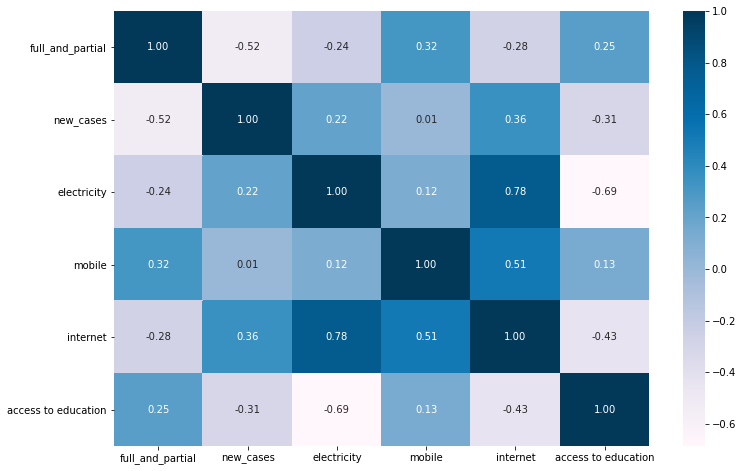

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(d.corr(), annot=True, fmt='.2f', cmap='PuBu')
plt.savefig('output.png', dpi=500, bbox_inches='tight')

In [29]:
def normalize():
    for column in d.columns:
        mean, std = np.mean(d[column]), np.std(d[column])
        d[f"n_{column}"] = d[column].apply(lambda x : (x - mean) / std)
    print("Done")

In [30]:
def regression(model):
    model.fit(X_train, y_train)
    coef = model.coef_
    pred = model.predict(X_test)
    error = math.sqrt((pred - y_test) ** 2)
    return coef, pred, error

In [42]:
def regression_(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = math.sqrt((pred - y_test) ** 2)
    return pred, error

In [31]:
normalize()

Done


In [33]:
normalized_d = d[d.columns[6:]]

In [36]:
x_columns = list(normalized_d.columns[:5])
X, y = normalized_d[x_columns], d["n_access to education"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=2022)

In [37]:
model1 = LinearRegression()
coef1, pred1, error1 = regression(model1)
print(pred1, float(y_test))
print(coef1)

[0.72016368] -0.5116248382075629
[-0.09345208 -0.37733988 -0.88874562  0.24407038  0.36807736]


In [38]:
model2 = Lasso()
coef2, pred2, error2 = regression(model2)
print(pred2, float(y_test))
print(coef2)

[0.04651135] -0.5116248382075629
[ 0. -0. -0.  0. -0.]


In [39]:
model3 = Ridge()
coef3, pred3, error3 = regression(model3)
print(pred3, float(y_test))
print(coef3)

[0.54018367] -0.5116248382075629
[-0.08272571 -0.2940767  -0.66287374  0.29690003  0.11110248]


In [40]:
model5 = SVR(kernel="linear")
coef5, pred5, error5 = regression(model5)
print(pred5, float(y_test))
print(coef5)

[0.362387] -0.5116248382075629
[[-0.05664894 -0.27931706 -0.56183942  0.12697105  0.31164914]]


In [43]:
model7 = DecisionTreeRegressor(max_depth=1)
pred7, error7 = regression_(model7)
print(pred7, float(y_test))

[-0.50199173] -0.5116248382075629


In [46]:
d.corr()["access to education"][:6]

full_and_partial       0.252461
new_cases             -0.314122
electricity           -0.685265
mobile                 0.131755
internet              -0.430042
access to education    1.000000
Name: access to education, dtype: float64